In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pdffuns import norm2D
from mayavi import mlab

In [3]:
mlab.init_notebook('x3d', 970, 600)
plt.rcParams['figure.figsize'] = (14, 14)

Notebook initialized with x3d backend.


## Laboratory exercise 2

We first define our domain of interest, across which we are going to compute the probability density functions, to be in the interval $x \in [-10, 10]$ and $y \in [-10, 10]$

In [4]:
x = np.arange(-10, 10.1, 0.1).reshape(-1, 1)
y = np.arange(-10, 10.1, 0.1).reshape(-1, 1)

We define the probability functions parameters.  

\begin{align*}
    \mu_1 = \begin{bmatrix}3 \\ 6\end{bmatrix}
    \,
    \Sigma_1 = \begin{bmatrix}\frac{1}{2} & 0 \\ 0 & 2\end{bmatrix}
    \text{ and }
    \mu_2 = \begin{bmatrix}3 \\ -2\end{bmatrix}
    \,
    \Sigma_2 = \begin{bmatrix}2 & 0 \\ 0 & 2\end{bmatrix}
\end{align*}

In [5]:
sigma_1 = np.array([.5, 0, 0, 2]).reshape(2, 2)
mu_1 = np.array([3, 6]).reshape(-1, 1)

sigma_2 = np.array([2, 0, 0, 2]).reshape(2, 2)
mu_2 = np.array([3, -2]).reshape(-1, 1)

We compute their gaussian probability density functions over the previously chosen domain.

In [6]:
dist_1 = norm2D(mu_1, sigma_1, x, y)
dist_2 = norm2D(mu_2, sigma_2, x, y)

pw_1 = 0.1

weighted_dist_1 = np.array([*dist_1[:2], pw_1*dist_1[2]])
weighted_dist_2 = np.array([*dist_2[:2], (1-pw_1)*dist_2[2]])

We can now visualize the probability density functions. If we multiply the probability density functions by their prior probability, we can visualize the weighted probability density functions, or posterior probability.

In [16]:
def plot_3d(pdf_A, pdf_B, filename):
    mlab.clf()
    mlab.surf(pdf_A[2], colormap='Reds', warp_scale=1e3)
    mlab.surf(pdf_B[2], colormap='Blues', warp_scale=1e3)
    mlab.view(distance=600, focalpoint=(3, 0, 0))
    # the figure is saved and displayed as an image
    # because the interactive version is not convertible to pdf
    mlab.savefig(filename=filename, size=(2000, 2000))

In [17]:
plot_3d(dist_1, dist_2, 'pdf.png')
plot_3d(weighted_dist_1, weighted_dist_2, 'wpdf.png')

Probability Density Function | Weighted Probability Density Function
- | -
![](pdf.png) | ![](wpdf.png)

To visualize the decision boundary, we use a little trick. We first substract one pdf from the other, which gives us a matrix with a sign change on the decision boundary. We use this change of sign to extract the boundary by differentiating the sign matrix and checking when the derivative is not equal to zero.
To visualize the decision areas, we use a sequential colormap on a binary matrix obtained by checking the inequality between the two pdfs.

In [9]:
def plot_regions(pdf_A, pdf_B):
    change = ((np.diff(np.sign(pdf_A[2] - pdf_B[2])) != 0)*1).T
    regions = (pdf_A[2] > pdf_B[2]).T*1

    fig, ax = plt.subplots(1, 2)
    ax[0].contour(*pdf_A, cmap=cm.Reds)
    ax[0].contour(*pdf_B, cmap=cm.Blues)
    ax[0].imshow(change, cmap=cm.binary, extent=[-10, 10, -10, 10], origin='lower')

    ax[1].contour(*pdf_A, cmap=cm.Reds)
    ax[1].contour(*pdf_B, cmap=cm.Blues)
    ax[1].imshow(regions, cmap=cm.seismic, extent=[-10, 10, -10, 10], origin='lower')

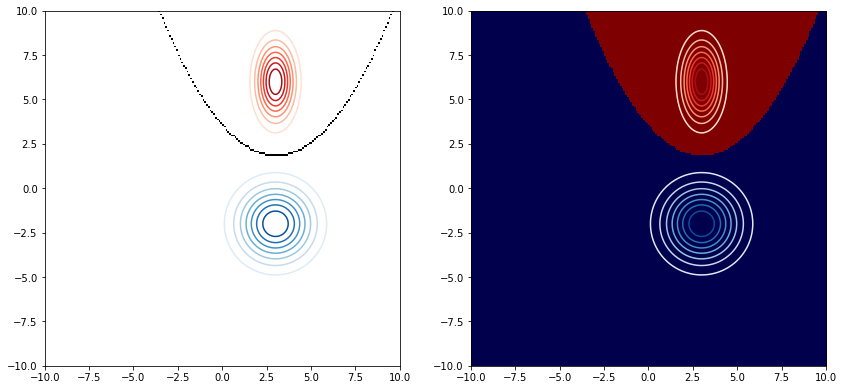

In [10]:
plot_regions(dist_1, dist_2)

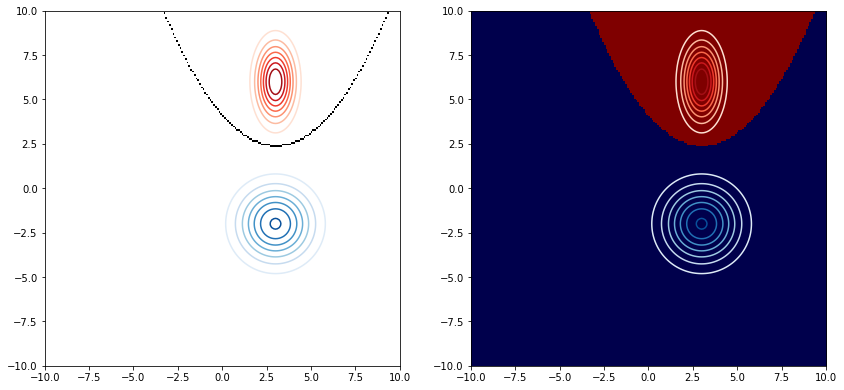

In [11]:
plot_regions(weighted_dist_1, weighted_dist_2)

The difference is subtle, but we can see that the decision boundary gets further from $\omega_2$ as its prior probability increases. To better visualize this effect, we generate two new pdfs with closer mean vectors.
\begin{align}
\mu_3 = \begin{bmatrix}3 \\ 2\end{bmatrix}
\mu_4 = \begin{bmatrix}3 \\ 1\end{bmatrix}
\end{align}

In [12]:
mu_3 = np.array([3, 2]).reshape(-1, 1)
mu_4 = np.array([3, 1]).reshape(-1, 1)

dist_3 = norm2D(mu_3, sigma_1, x, y)
dist_4 = norm2D(mu_4, sigma_2, x, y)

weighted_dist_3 = np.array([*dist_3[:2], pw_1*dist_3[2]])
weighted_dist_4 = np.array([*dist_4[:2], (1-pw_1)*dist_4[2]])

In [13]:
plot_3d(dist_3, dist_4, 'pdf2.png')
plot_3d(weighted_dist_3, weighted_dist_4, 'wpdf2.png')

Probability Density Function | Weighted Probability Density Function
- | -
![](pdf2.png) | ![](wpdf2.png)

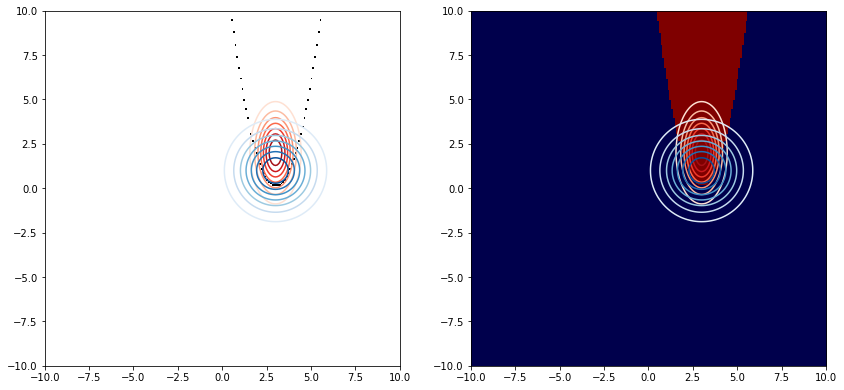

In [14]:
plot_regions(dist_3, dist_4)

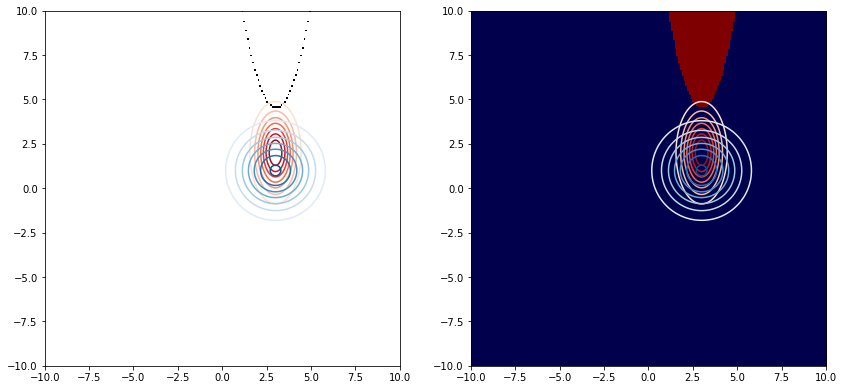

In [15]:
plot_regions(weighted_dist_3, weighted_dist_4)

In this case, we can clearly see that as the importance of $P(\omega_2)$ increases, the decision border is "pushed" outside of of $\omega_1$. A remarkable consequence of this is that even the mean vector of $\omega_1$ is inside the decision region of $\omega_2$.